In [3]:
from src import npz2png

file_path = "/home/smatsubara/documents/airlift/data/experiments/processed/all/P20240827-1552_processed.npz"
save_dir = "/home/smatsubara/documents/airlift/data/sandbox/visualize"

npz2png(file_path, save_dir,start_time=0.0,end_time=0.3,vmin=0,vmax=0.05)

h: 14000, w: 2500
endid: 840
img_data.shape: (840, 2500)
/home/smatsubara/documents/airlift/data/sandbox/visualize/P20240827-1552_processed_0img.png


In [ ]:
file_path2 = "/home/smatsubara/documents/airlift/data/sandbox/experiments/processed/P20240726-1607_processed.npz"
npz2png(file_path2, save_dir,start_time=0.0,end_time=5.0,vmin=0,vmax=0.05)

h: 14000, w: 2500
endid: 840
img_data.shape: (840, 2500)
/home/smatsubara/documents/airlift/data/sandbox/visualize/P20240726-1607_processed_0img.png


===== Dimension 3 (Residual: 1-pred4-pred5) =====
Mean Squared Error (MSE): 0.001311
Root Mean Squared Error (RMSE): 0.036202
Mean Absolute Error (MAE): 0.029218
R2 Score: -0.043088


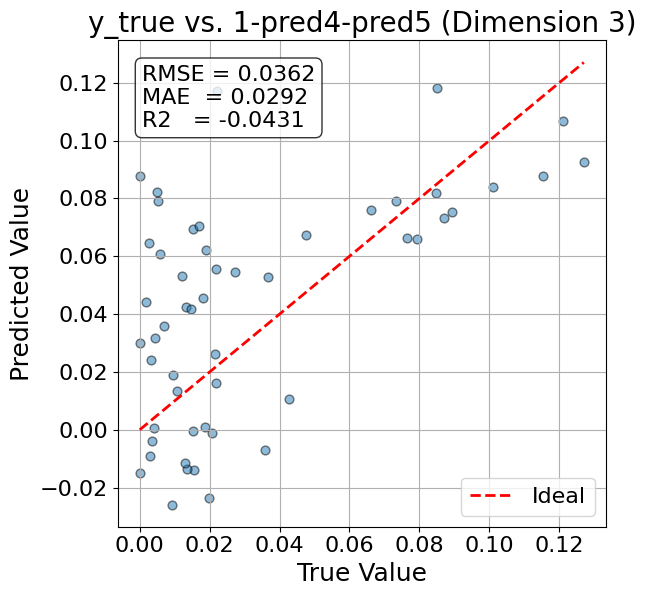

===== Dimension 3 (Direct Prediction) =====
Mean Squared Error (MSE): 0.000520
Root Mean Squared Error (RMSE): 0.022813
Mean Absolute Error (MAE): 0.017963
R2 Score: 0.585786


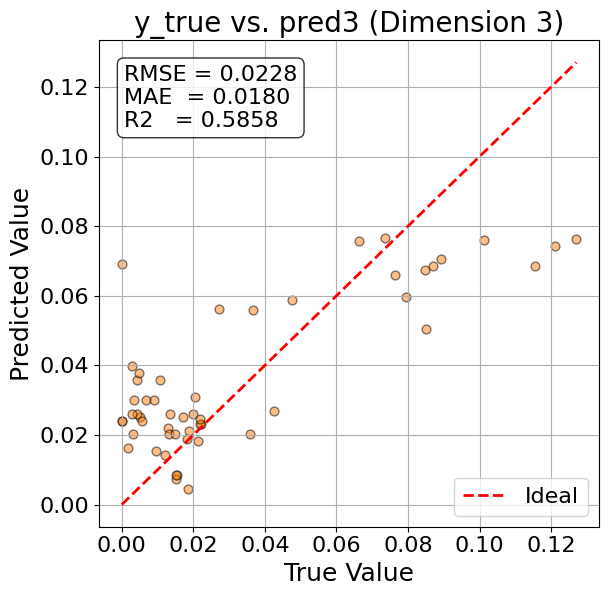

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ファイルパスの指定
y_pred_path = "/home/smatsubara/documents/airlift/data/outputs_real/optuna/runs/2025-12-21/22-18-50/y_pred.npy"
y_true_path = "/home/smatsubara/documents/airlift/data/outputs_real/optuna/runs/2025-12-21/22-18-50/y_true.npy"

# データの読み込み
y_pred = np.load(y_pred_path)
y_true = np.load(y_true_path)

   

true_4 = y_true[:, 4]
pred_4 = y_pred[:, 4]
mse_4 = mean_squared_error(true_4, pred_4)
mae_4 = mean_absolute_error(true_4, pred_4)
r2_4 = r2_score(true_4, pred_4)
rmse_4 = np.sqrt(mse_4)

true_5 = y_true[:, 5]
pred_5 = y_pred[:, 5]
mse_5 = mean_squared_error(true_5, pred_5)
mae_5 = mean_absolute_error(true_5, pred_5)
r2_5 = r2_score(true_5, pred_5)
rmse_5 = np.sqrt(mse_5)

true_3 = y_true[:, 3]
pred_3 = y_pred[:, 3]
pred_3_residual = 1 - pred_4 - pred_5

mse_3_residual = mean_squared_error(true_3, pred_3_residual)
mae_3_residual = mean_absolute_error(true_3, pred_3_residual)
r2_3_residual = r2_score(true_3, pred_3_residual)
rmse_3_residual = np.sqrt(mse_3_residual)

mse_3 = mean_squared_error(true_3, pred_3)
mae_3 = mean_absolute_error(true_3, pred_3)
r2_3 = r2_score(true_3, pred_3)
rmse_3 = np.sqrt(mse_3)

print(f"===== Dimension 3 (Residual: 1-pred4-pred5) =====")
print(f"Mean Squared Error (MSE): {mse_3_residual:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_3_residual:.6f}")
print(f"Mean Absolute Error (MAE): {mae_3_residual:.6f}")
print(f"R2 Score: {r2_3_residual:.6f}")

plt.figure(figsize=(6,6))
plt.scatter(true_3, pred_3_residual, alpha=0.5, edgecolor='k', color='tab:blue', s=40)
plt.plot([true_3.min(), true_3.max()], [true_3.min(), true_3.max()], 'r--', lw=2, label="Ideal")
plt.xlabel("True Value", fontsize=18)
plt.ylabel("Predicted Value", fontsize=18)
plt.title("y_true vs. 1-pred4-pred5 (Dimension 3)", fontsize=20)
plt.legend(fontsize=16, loc="lower right")
plt.grid(True)
plt.tight_layout()
# MSEはもはやプロットしたくないのでRMSE, MAE, R2のみ
textstr = '\n'.join((
    f'RMSE = {rmse_3_residual:.4f}',
    f'MAE  = {mae_3_residual:.4f}',
    f'R2   = {r2_3_residual:.4f}'
))
plt.gca().text(
    0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=16,
    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

print(f"===== Dimension 3 (Direct Prediction) =====")
print(f"Mean Squared Error (MSE): {mse_3:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_3:.6f}")
print(f"Mean Absolute Error (MAE): {mae_3:.6f}")
print(f"R2 Score: {r2_3:.6f}")

plt.figure(figsize=(6,6))
plt.scatter(true_3, pred_3, alpha=0.5, edgecolor='k', color='tab:orange', s=40)
plt.plot([true_3.min(), true_3.max()], [true_3.min(), true_3.max()], 'r--', lw=2, label="Ideal")
plt.legend(fontsize=16, loc="lower right")
plt.xlabel("True Value", fontsize=18)
plt.ylabel("Predicted Value", fontsize=18)
plt.title("y_true vs. pred3 (Dimension 3)", fontsize=20)
plt.legend(fontsize=16, loc="lower right")
plt.grid(True)
plt.tight_layout()
# MSEはもはやプロットしたくないのでRMSE, MAE, R2のみ
textstr2 = '\n'.join((
    f'RMSE = {rmse_3:.4f}',
    f'MAE  = {mae_3:.4f}',
    f'R2   = {r2_3:.4f}'
))
plt.gca().text(
    0.05, 0.95, textstr2, transform=plt.gca().transAxes, fontsize=16,
    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [19]:
import numpy as np
input_path= "/home/smatsubara/documents/airlift/data/experiments/dataset/nowall/x_train_nowall.npy"
output_path= "/home/smatsubara/documents/airlift/data/experiments/dataset/nowall/t_train_nowall.npy"
x = np.load(input_path) 
t = np.load(output_path) 
print(x.shape)
print(t.shape)


(337, 2, 1400, 2000)
(337, 6)


(2, 1400, 2000)


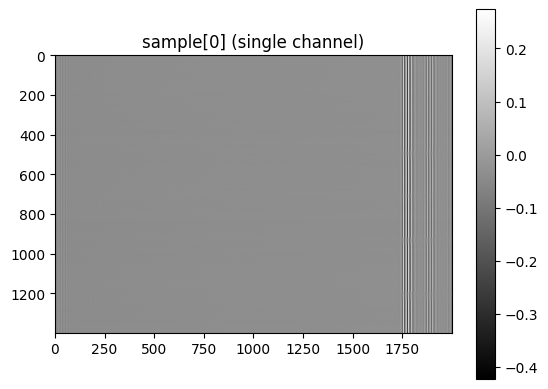

In [24]:
sample=x[0]
print(sample.shape)

import matplotlib.pyplot as plt

# sample[0]が画像(CH, H, W)の場合、そのまま可視化
img = sample[0]
if img.ndim == 2:
    plt.imshow(img, cmap='gray')
    plt.title("sample[0] (single channel)")
    plt.colorbar()
elif img.ndim == 3:
    # 複数chの場合は最初のchのみ表示
    plt.imshow(img[1], cmap='gray')
    plt.title("sample[0][0] (first channel)")
    plt.colorbar()
else:
    print("sample[0] の形が画像として正しくありません:", img.shape)
plt.show()
